In [51]:
# Please note I will only import the libraries in this code snippet and use the same set for further code snippets down the line.

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px
import warnings
warnings.filterwarnings('ignore')

file_path = 'Jobs.csv'
df = pd.read_csv(file_path) #before analysis, clean the data.
df. head(10)


,Job Name,label,Company Name,Job Type,Experience Required,Department,JD,City,Date Posted,Department.1
0,"Full Time New Job Positions .Net, .Netcore, Fl...",Premium Job,"Nayel Solutions, Pakistan",Full Time Jobs,2 Years Job Exp.,IT Jobs,"New Job Positions .net, .netcore, flutter, Tea...",Islamabad,12-Mar-21,IT Jobs
1,Full Time Senior Web Developer Jobs in Pakistan,Premium Job,"Eurosoft Tech Private Limited, Pakistan",Full Time Jobs,2 Years Job Exp.,IT Jobs,We are looking for an experienced Web Develope...,Karachi,12-Mar-21,Customer Service Jobs
2,Full Time Russian Speakers Jobs in Pakistan,Premium Job,"ICM JAPAN, Pakistan",Full Time Jobs,< 1 Year,Customer Service Jobs,International clients dealing exposure (B2B).S...,Karachi,12-Mar-21,Customer Service Job
3,Full Time Customer Support Specialist - Intern...,Premium Job,"ibex, Pakistan",Full Time Jobs,Job for Fresh Graduates,Customer Service Jobs,Responsible for acting as a liaison between ou...,Islamabad,9-Mar-21,Production Job
4,Full Time English Speaker - International Busi...,Premium Job,"ICM JAPAN, Pakistan",Full Time Job,< 1 Year,Customer Service Job,International clients dealing exposure (B2B) a...,Karachi,5-Mar-21,Sales Jobs
5,Full Time Socks Operation Manager And Socks In...,Premium Job,"Uni Hosiery Co. Inc., Pakistan",Full Time Job,5 Years Job Exp.,Production Job,NOTE: Apply By Sending Your CV/Resume to: hrdp...,Faisalabad,5-Mar-21,Publishing Jobs
6,Full Time Call Center - Lead Agent Jobs in Pak...,Premium Job,"Pakistan Sweet Home AFP, Pakistan",Full Time Jobs,3 Years Job Exp.,Sales Jobs,Each Lead Agent is responsible for generating ...,Islamabad,22-Feb-21,Admin Job
7,Full Time Manager Accounts & Taxation (CA) Job...,Premium Job,"Mercantile Enterprises Pvt Ltd, Pakistan",Full Time Jobs,4 Years Job Exp.,Publishing Jobs,We at Mercantile Enterprises (Pvt) Ltd is look...,Lahore,19-Feb-21,Computer Software Jobs
8,"Online Full Time Remote Researcher, Content Cr...",Premium Job,"Confidential, Pakistan",Full Time Job,< 1 Year,Admin Job,This job is a remote working opportunity. We a...,Faisalabad,17-Feb-21,Computer Software Job
9,Full Time Angularjs And .Net Core Developer Jo...,Premium Job,"Eurosoft Tech Private Limited, Pakistan",Full Time Jobs,7 Years Job Exp.,IT Jobs,Command on following skillsAngularJS\r\nNodeJs...,Karachi,16-Feb-21,Engineering Job


In [ ]:
# We need to clean the data first as lot of the "department" data is overlapping such in case of "IT Job" and "IT Jobs"
# We are going to merge the overlapping deparmental terminologies into signle department head. 
# Null values will be dealt later

department_mapping = {
    'IT Jobs': 'IT',
    'IT Job': 'IT',
    'Customer Service Jobs': 'Customer Service',
    'Customer Service Job': 'Customer Service',
    'Sales Jobs': 'Sales',
    'Sales Job': 'Sales',
    'Marketing Jobs': 'Marketing',
    'Marketing Job': 'Marketing',
    'Admin Jobs': 'Admin',
    'Admin Job': 'Admin',
    'Engineering Jobs': 'Engineering',
    'Engineering Job': 'Engineering',
    'Finance Jobs': 'Finance',
    'Finance Job': 'Finance',
    'HR & Recruiting Jobs': 'HR & Recruiting',
    'HR & Recruiting Job': 'HR & Recruiting',
    'Healthcare Jobs': 'Healthcare',
    'Healthcare Job': 'Healthcare',
    'Management Jobs': 'Management',
    'Management Job': 'Management',
    'Support Services Jobs': 'Support Services',
    'Support Services Job': 'Support Services',
    'Pharmacy Jobs': 'Pharmacy',
    'Pharmacy Job': 'Pharmacy',
    'Telecom Jobs': 'Telecom',
    'Telecom Job': 'Telecom',
    'Real Estate Jobs': 'Real Estate',
    'Real Estate Job': 'Real Estate',
    'Insurance Jobs': 'Insurance',
    'Insurance Job': 'Insurance',
    'Hospitality Jobs': 'Hospitality',
    'Hospitality Job': 'Hospitality',
    'Education Jobs': 'Education',
    'Education Job': 'Education',
    'Supply Chain Jobs': 'Supply Chain',
    'Supply Chain Job': 'Supply Chain',
    'Accounting Jobs': 'Accounting',
    'Accounting Job': 'Accounting',
    'Construction Jobs': 'Construction',
    'Construction Job': 'Construction',
    'Electronics Jobs': 'Electronics',
    'Electronics Job': 'Electronics',
    'Medical & Dental Jobs': 'Medical & Dental',
    'Medical & Dental Job': 'Medical & Dental',
    'Publishing Jobs': 'Publishing',
    'Publishing Job': 'Publishing',
    'Restaurant Jobs': 'Restaurant',
    'Restaurant Job': 'Restaurant',
    'Media Jobs': 'Media',
    'Media Job': 'Media',
    'NGO Jobs': 'NGO',
    'NGO Job': 'NGO',
    'Economics Jobs': 'Economics',
    'Economics Job': 'Economics',
    'Production Jobs': 'Production',
    'Production Job': 'Production',
    'Maintenance Jobs': 'Maintenance',
    'Maintenance Job': 'Maintenance',
    'Personal Care Jobs': 'Personal Care',
    'Personal Care Job': 'Personal Care',
    'Oil & Gas Jobs': 'Oil & Gas',
    'Oil & Gas Job': 'Oil & Gas',
    'Sports Jobs': 'Sports',
    'Sports Job': 'Sports',
    'Computer Hardware Jobs': 'Computer Hardware',
    'Computer Hardware Job': 'Computer Hardware',
    'Security Jobs': 'Security',
    'Security Job': 'Security',
    'Social Services Jobs': 'Social Services',
    'Social Services Job': 'Social Services',
    'Pharma & Biotechnology Jobs': 'Pharma & Biotechnology',
    'Pharma & Biotechnology Job': 'Pharma & Biotechnology',
    'Architect Jobs': 'Architect',
    'Architect Job': 'Architect',
    'Consulting Jobs': 'Consulting',
    'Consulting Job': 'Consulting',
    'Pathology Jobs': 'Pathology',
    'Pathology Job': 'Pathology',
    'Retail Jobs': 'Retail',
    'Retail Job': 'Retail',
    'Consumer Jobs': 'Consumer',
    'Consumer Job': 'Consumer',
    'Agriculture Job': 'Agriculture',
    'Commission Job': 'Commission',
    'Aviation Jobs': 'Aviation',
    'Aviation Job': 'Aviation',
    'Banking Jobs': 'Banking',
    'Banking Job': 'Banking',
    'Career Fairs Jobs': 'Career Fairs',
    'Housekeeping Jobs': 'Housekeeping',
    'Housekeeping Job': 'Housekeeping',
    'Warehousing Jobs': 'Warehousing',
    'Warehousing Job': 'Warehousing',
    'Recruitment Jobs': 'Recruitment',
    'Recruitment Job': 'Recruitment',
    'Procurement Jobs': 'Procurement',
    'Procurement Job': 'Procurement',
    'Nursing Jobs': 'Nursing',
    'Nursing Job': 'Nursing',
    'Government Jobs': 'Government',
    'Government Job': 'Government'
}

df['Department'] = df['Department'].replace(department_mapping)

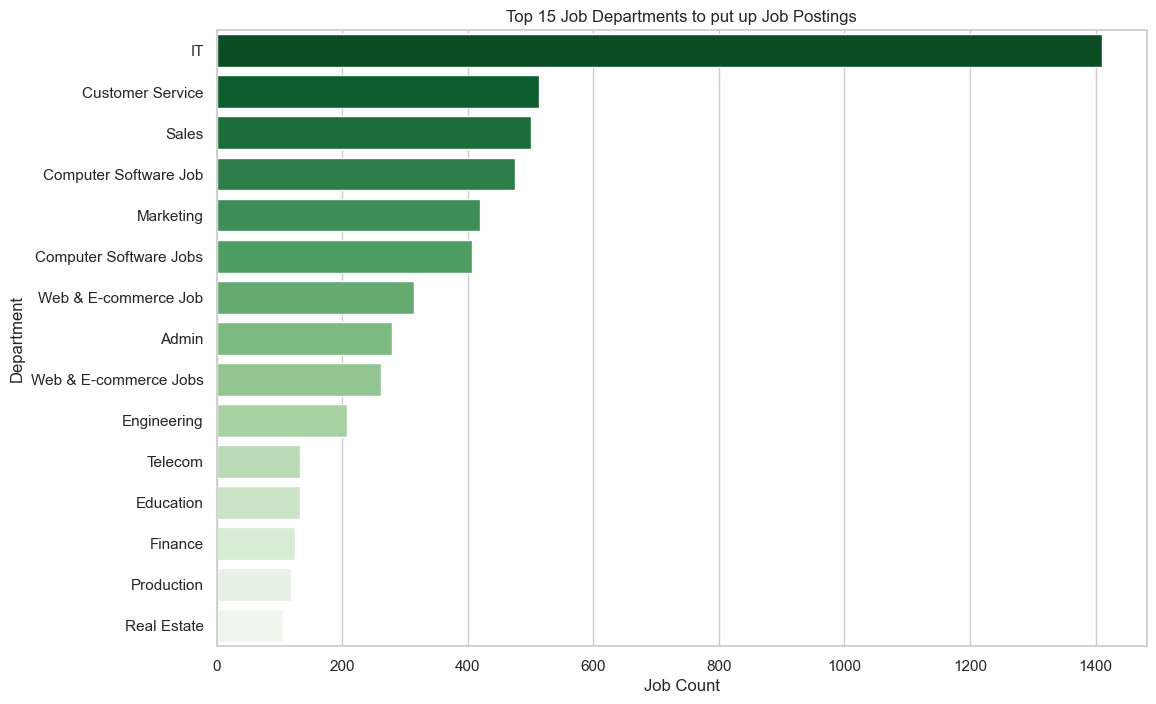

In [125]:

sns.set_style('whitegrid')

Pallete = sns.color_palette("Greens", n_colors=15)[::-1]
sns.set_palette(Pallete)

departmental_job_distribution = df['Department'].value_counts()
top20_departments = departmental_job_distribution.head(15)

plt.figure(figsize=(12, 8), )
sns.barplot(x = top20_departments.values,
            y = top20_departments.index,
            palette=Pallete
            )
plt.title('Top 15 Job Departments to put up Job Postings')
plt.xlabel('Job Count')
plt.ylabel('Department')
plt.show()

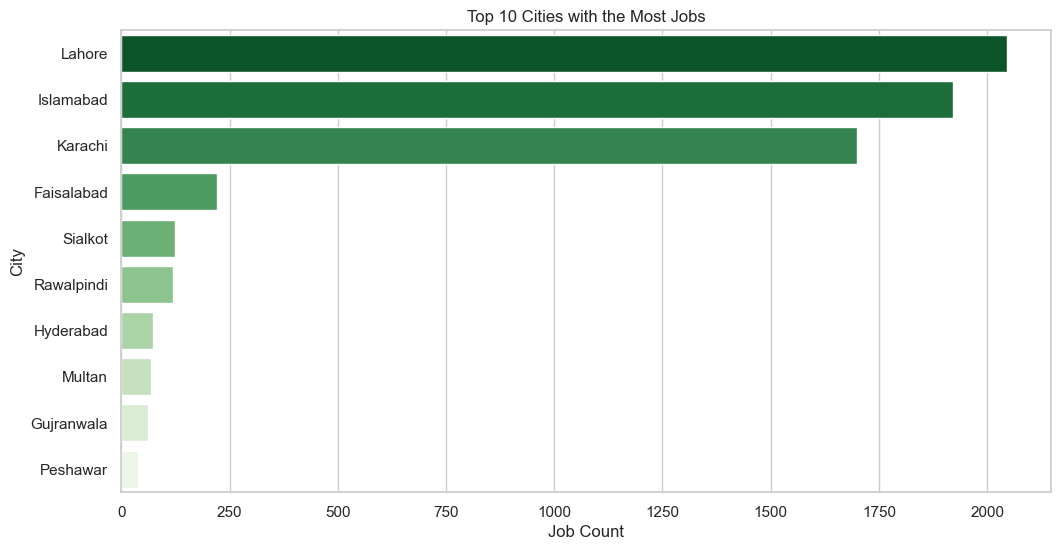

In [109]:
sns.set_theme(style = 'whitegrid')
city_job_distribution = df['City'].value_counts()
top_cities = city_job_distribution.head(10)

plt.figure(figsize=(12,6))

Palette = sns.color_palette(
    "Greens", n_colors= 10
)[::-1]
sns.set_palette(Palette)

sns.barplot(x=  top_cities.values, y =top_cities.index, palette=  Palette)

plt.title('Top 10 Cities with the Most Jobs')
plt.xlabel('Job Count')
plt.ylabel('City')
plt.show()

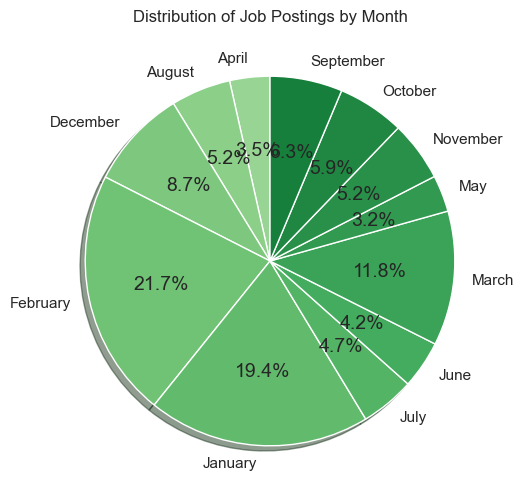

In [158]:


# Converting 'Date Posted' to datetime format for analysis
df['Date Posted'] = pd.to_datetime(df['Date Posted'], errors='coerce')

# Extracting year and month for trend analysis
df['YearMonth'] = df['Date Posted'].dt.strftime('%B')

# Question 3: Variation of job postings over time (by month)
time_series = df['YearMonth'].value_counts().sort_index()

# assigning colors of coolwarm as plasma is bit dark for this
colors = plt.cm.Greens(np.linspace(0.4, 0.8, len(time_series))) 

plt.figure(figsize=(10, 6))
plt.pie(
    time_series.values, 
    labels=time_series.index, 
    autopct='%1.1f%%',
    shadow=True,
    startangle=90, 
    colors=colors, 
    wedgeprops={'edgecolor': 'white'}
)

plt.title('Distribution of Job Postings by Month')
plt.show()


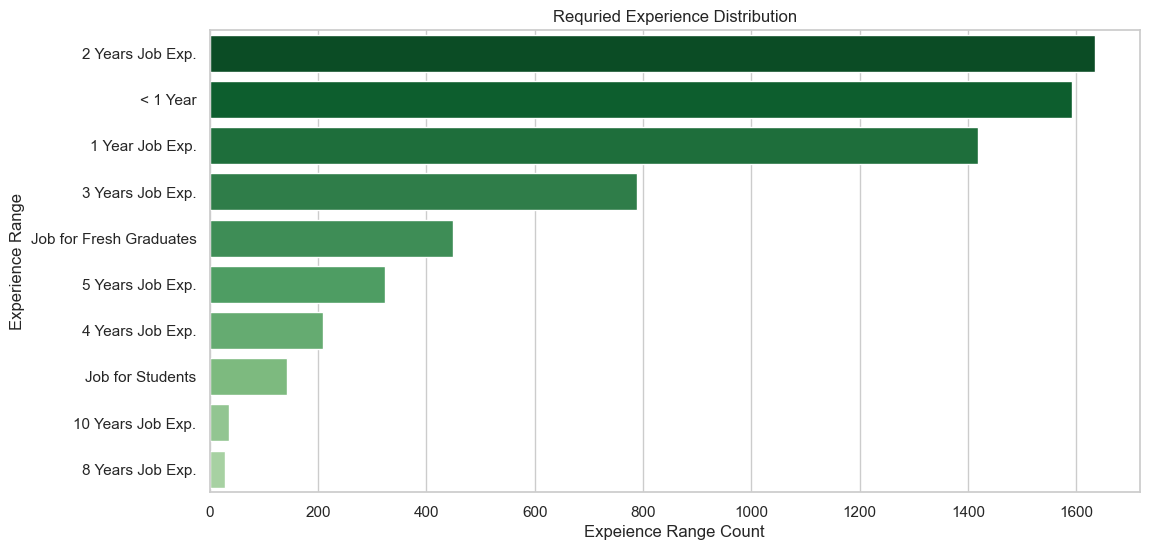

In [142]:
experience_distribution = df['Experience Required'].value_counts().head(10)

plt.figure(figsize=(12,6))


#sns.set_palette(Palette)
sns.barplot(x=experience_distribution.values, y=experience_distribution.index,
            palette = Pallete,
            ) #Palette is extracted from previous code
plt.title('Requried Experience Distribution')
plt.xlabel('Expeience Range Count')
plt.ylabel('Experience Range')
plt.show()

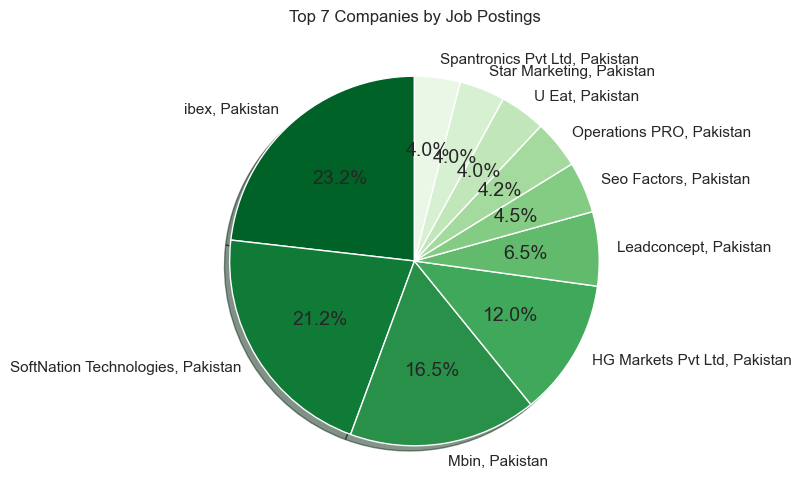

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extracting top 7 job posting organizations
job_posters = df['Company Name'].value_counts().head(5)
Palette = sns.color_palette("Greens", len(job_posters))[::-1]

plt.figure(figsize=(10, 6))
plt.pie(
    job_posters.values,
    labels=job_posters.index,
    autopct='%1.1f%%',
    startangle=90,
    shadow=True,
    colors=Palette, 
)
plt.title("Top 7 Companies by Job Postings")
plt.show()


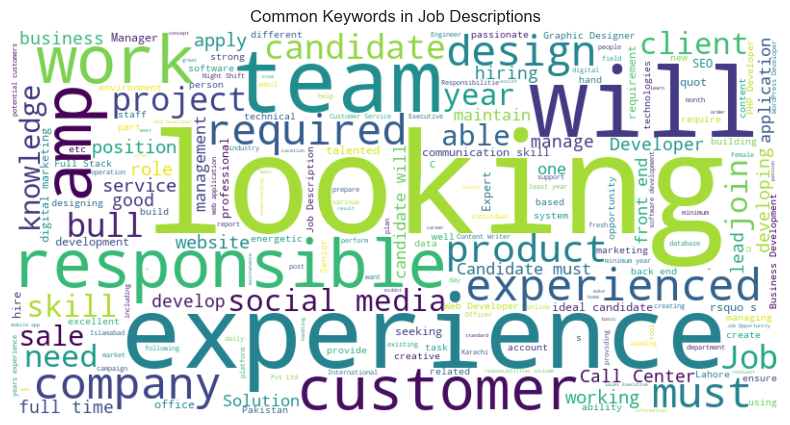

In [38]:
from wordcloud import WordCloud

all_descriptions = ' '.join(df['JD'].dropna())
wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate(all_descriptions)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Common Keywords in Job Descriptions')
plt.axis('off')
plt.show()

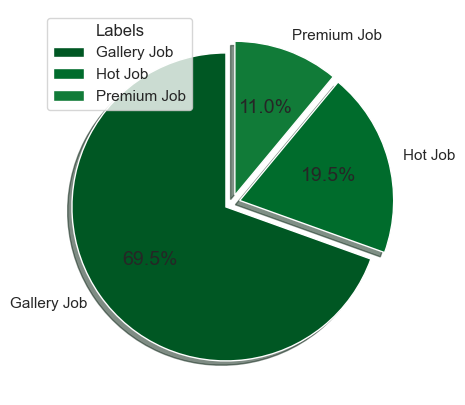

In [134]:
label_Categories = df['label'].value_counts()

plt.figure(figsize=(10,5))
explode = [0.05] * len(label_Categories)

plt.pie(
    label_Categories.values,
    explode=explode,
    labels=label_Categories.index,
    autopct='%1.1f%%',
    startangle=90,
    shadow= True,
    colors= Pallete,
)
plt.legend(label_Categories.index, title = "Labels", loc ="best")


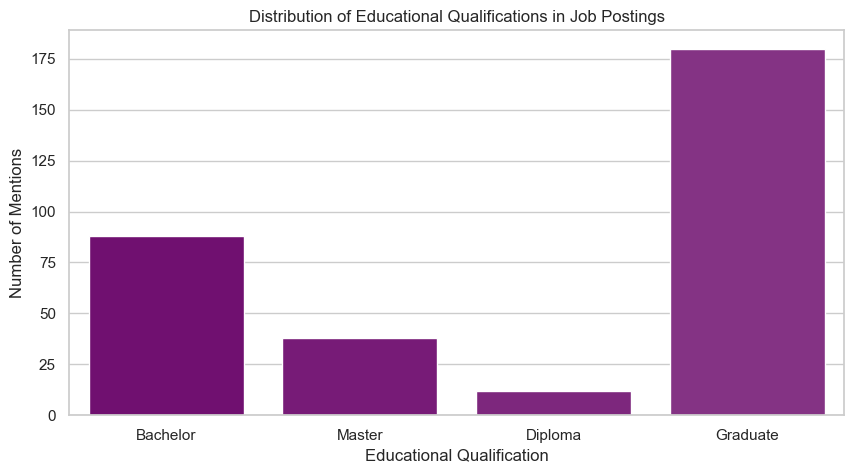

In [40]:
import re
qualifications = ['Bachelor', 'Master', 'Diploma', 'Graduate']

education_count = {qualification:sum(df['JD'].dropna().apply(lambda x: bool(re.search(qualification, x,re.IGNORECASE))))
                   for qualification in qualifications}

education_count_series = pd.Series(education_count)
plt.figure(figsize = (10,5))
sns.barplot(x = education_count_series.index, y = education_count_series.values,
            palette= purple_Palette)
plt.title('Distribution of Educational Qualifications in Job Postings')
plt.xlabel('Educational Qualification')
plt.ylabel('Number of Mentions')
plt.xticks(rotation=0)
plt.show()

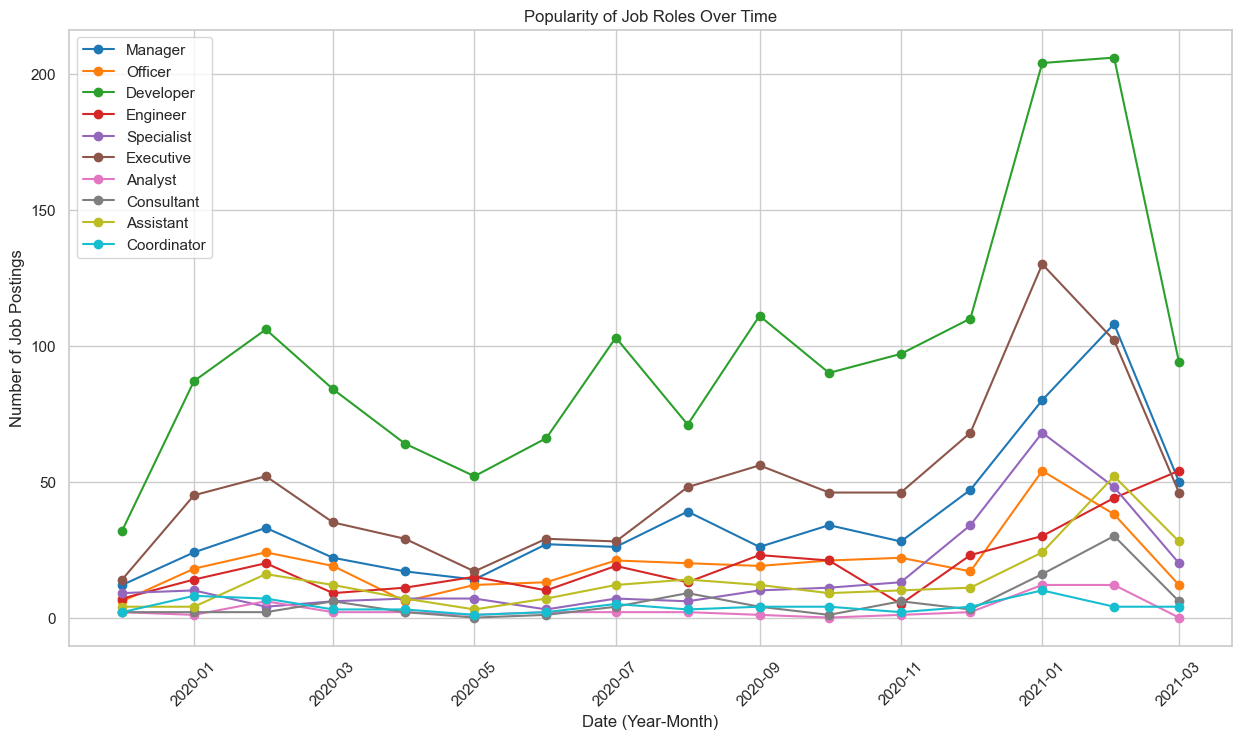

In [41]:
job_titles = ['Manager','Officer','Developer','Engineer','Specialist','Executive','Analyst','Consultant','Assistant','Coordinator']

job_title_series = {role: df[df['Job Name'].str.contains(role, case=False, na=False)]['YearMonth'].value_counts().sort_index() for role in job_titles}
df_time_series_roles = pd.DataFrame(job_title_series).fillna(0)

plt.figure(figsize=(15, 8))
colors = plt.get_cmap('tab10')  # Colormap

for i, role in enumerate(job_titles):  # Use enumerate() here
    plt.plot(df_time_series_roles.index.to_timestamp(), 
             df_time_series_roles[role], 
             label=role, 
             marker='o', 
             color=colors(i % 10))  # Correct way to assign colors


plt.title('Popularity of Job Roles Over Time')
plt.xlabel('Date (Year-Month)')
plt.ylabel('Number of Job Postings')
plt.legend()
plt.xticks(rotation=45)
plt.show()


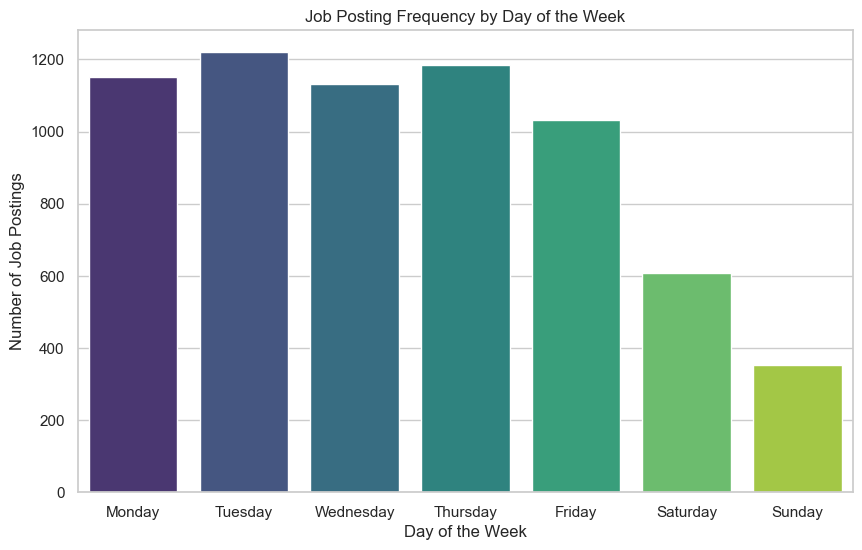

In [44]:
df['Date Posted'] = pd.to_datetime(df['Date Posted'])

# Extract the day of the week
df['DayOfWeek'] = df['Date Posted'].dt.day_name()

# Count the frequency of job postings by day of the week
day_of_week_distribution = df['DayOfWeek'].value_counts()

ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

day_of_week_distribution = day_of_week_distribution.reindex(ordered_days)


plt.figure(figsize=(10, 6))
sns.barplot(x=day_of_week_distribution.index, y=day_of_week_distribution.values, palette='viridis')
plt.title('Job Posting Frequency by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Job Postings')
plt.show()


Cluster 0:
                                              Job Name              Department
1      Full Time Senior Web Developer Jobs in Pakistan                 IT Jobs
9    Full Time Angularjs And .Net Core Developer Jo...                 IT Jobs
10    Full Time Sr. Backend Developer Jobs in Pakistan  Computer Software Jobs
22   Online Full Time Senior Software Engineer - Ba...         Engineering Job
23   Online Full Time Senior Software Engineer - Fr...         Engineering Job
24   Online Full Time Senior Software Engineer - Fu...         Engineering Job
31   Full Time Node.Js And Angular Developer Jobs i...                 IT Jobs
35   Full Time Mobile Application Developer Jobs in...                 IT Jobs
121  Full Time QA Automation Developer (Pakistan) J...                  IT Job
127  Full Time Specialist Software Development Job ...             Telecom Job

Cluster 1:
                                              Job Name              Department
28            Full Time UI/U

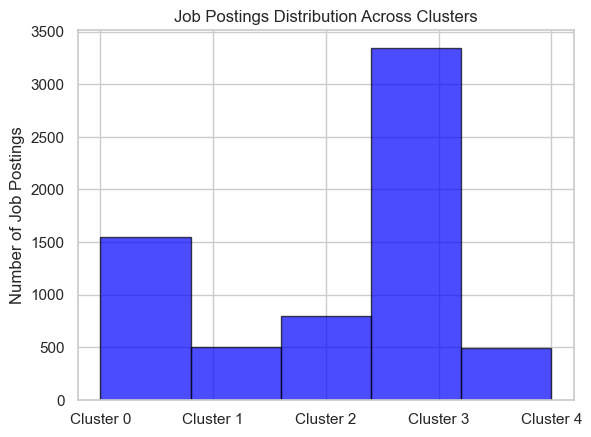

In [45]:

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer # This converts a text elements into numbers based on frequency of word in text
from sklearn.cluster import KMeans #creates clusters of words based on their score
import matplotlib.pyplot as plt

# Step 1: Load the dataset
df = pd.read_csv("Jobs.csv")  # Replace with your actual file

# Step 2: Combine relevant text columns (Job Name, JD, Department)
df['text'] = df['Job Name'].fillna('') + ' ' + df['JD'].fillna('') 

# Step 3: Convert text data into numerical vectors using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=2000)  # Remove common words
X = vectorizer.fit_transform(df['text'])

# Step 4: Apply K-Means Clustering
num_clusters = 5  # Choose the number of clusters based on domain knowledge or Elbow Method
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Step 5: Analyze the clusters
for i in range(num_clusters):
    print(f"\nCluster {i}:")
    print(df[df['Cluster'] == i][['Job Name', 'Department']].head(10))  # Show sample jobs

# Step 6: Visualizing the cluster distribution
plt.hist(df['Cluster'], bins=num_clusters, alpha=0.7, color='blue', edgecolor='black')
plt.xticks(ticks=range(num_clusters), labels=[f'Cluster {i}' for i in range(num_clusters)])
plt.ylabel('Number of Job Postings')
plt.title('Job Postings Distribution Across Clusters')
plt.show()



Cluster 0:
                                             Job Name             Department
2         Full Time Russian Speakers Jobs in Pakistan  Customer Service Jobs
4   Full Time English Speaker - International Busi...   Customer Service Job
11  Online Full Time Customer Sales Representative...  Customer Service Jobs
12  Full Time Client Relationship Executive Jobs i...             Sales Jobs
13  Full Time Business Development Executive - BDE...             Sales Jobs

Cluster 1:
                                            Job Name             Department
0  Full Time New Job Positions .Net, .Netcore, Fl...                IT Jobs
3  Full Time Customer Support Specialist - Intern...  Customer Service Jobs
5  Full Time Socks Operation Manager And Socks In...         Production Job
6  Full Time Call Center - Lead Agent Jobs in Pak...             Sales Jobs
7  Full Time Manager Accounts & Taxation (CA) Job...        Publishing Jobs

Cluster 2:
                                              

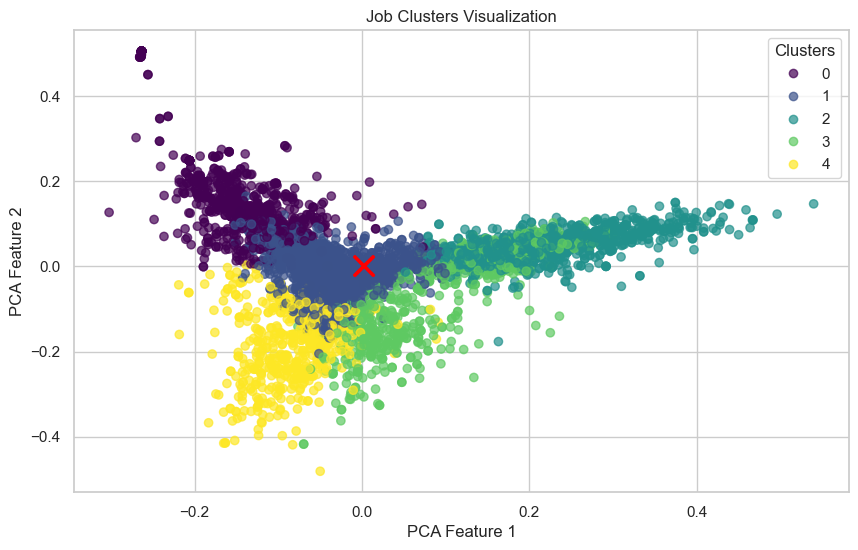

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer  # Converts text into numerical vectors
from sklearn.cluster import KMeans  # Clustering model
from sklearn.decomposition import PCA  # Dimensionality reduction for visualization

# Step 1: Load the dataset
df = pd.read_csv("Jobs.csv")  # Replace with your actual file

# Step 2: Combine relevant text columns
df['text'] = df['Job Name'].fillna('') + ' ' + df['JD'].fillna('')

# Step 3: Convert text data into numerical vectors using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)  
X = vectorizer.fit_transform(df['text'])

# Step 4: Apply K-Means Clustering
num_clusters = 5  
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Step 5: Print sample jobs from each cluster
for i in range(num_clusters):
    print(f"\nCluster {i}:")
    print(df[df['Cluster'] == i][['Job Name', 'Department']].head(5))  # Show 5 sample jobs

# Step 6: Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())  # Convert sparse matrix to dense before PCA

# Step 7: Scatter plot of clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200, label='Centroids')

# Add legend and labels
plt.xlabel("PCA Feature 1")
plt.ylabel("PCA Feature 2")
plt.title("Job Clusters Visualization")
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()

